# AdaBoost - Адаптивный бустинг

## Данные

**Определить съедобный гриб или ядовитый?**

Источник данных: https://archive.ics.uci.edu/ml/datasets/Mushroom


Эти данные содержат описание гипотетических примеров для 23 видов грибов из семейства шампиньоновых (стр. 500-525). Каждый вид характеризуется либо как съедобный, либо как ядовитый, либо неизвестной съедобности (не рекомендуется в пищу). Этот последний класс был объединён с классом ядовитых. Источник явно пишет, что не существует простого правила для определения съедобности гриба.


Информация об атрибутах:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Цель

**Важно: цель будет не в том, чтобы создать модель предсказания!**

**Общая цель в данной задаче состоит в том, чтобы с помощью машинного обучения и бустинга создать не просто предиктивную модель, а общее руководство по характеристикам, на которые нужно обращать внимание при собирании грибов.**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('../DATA/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
df['class'].unique()

array(['p', 'e'], dtype=object)

## Исследование данных - EDA

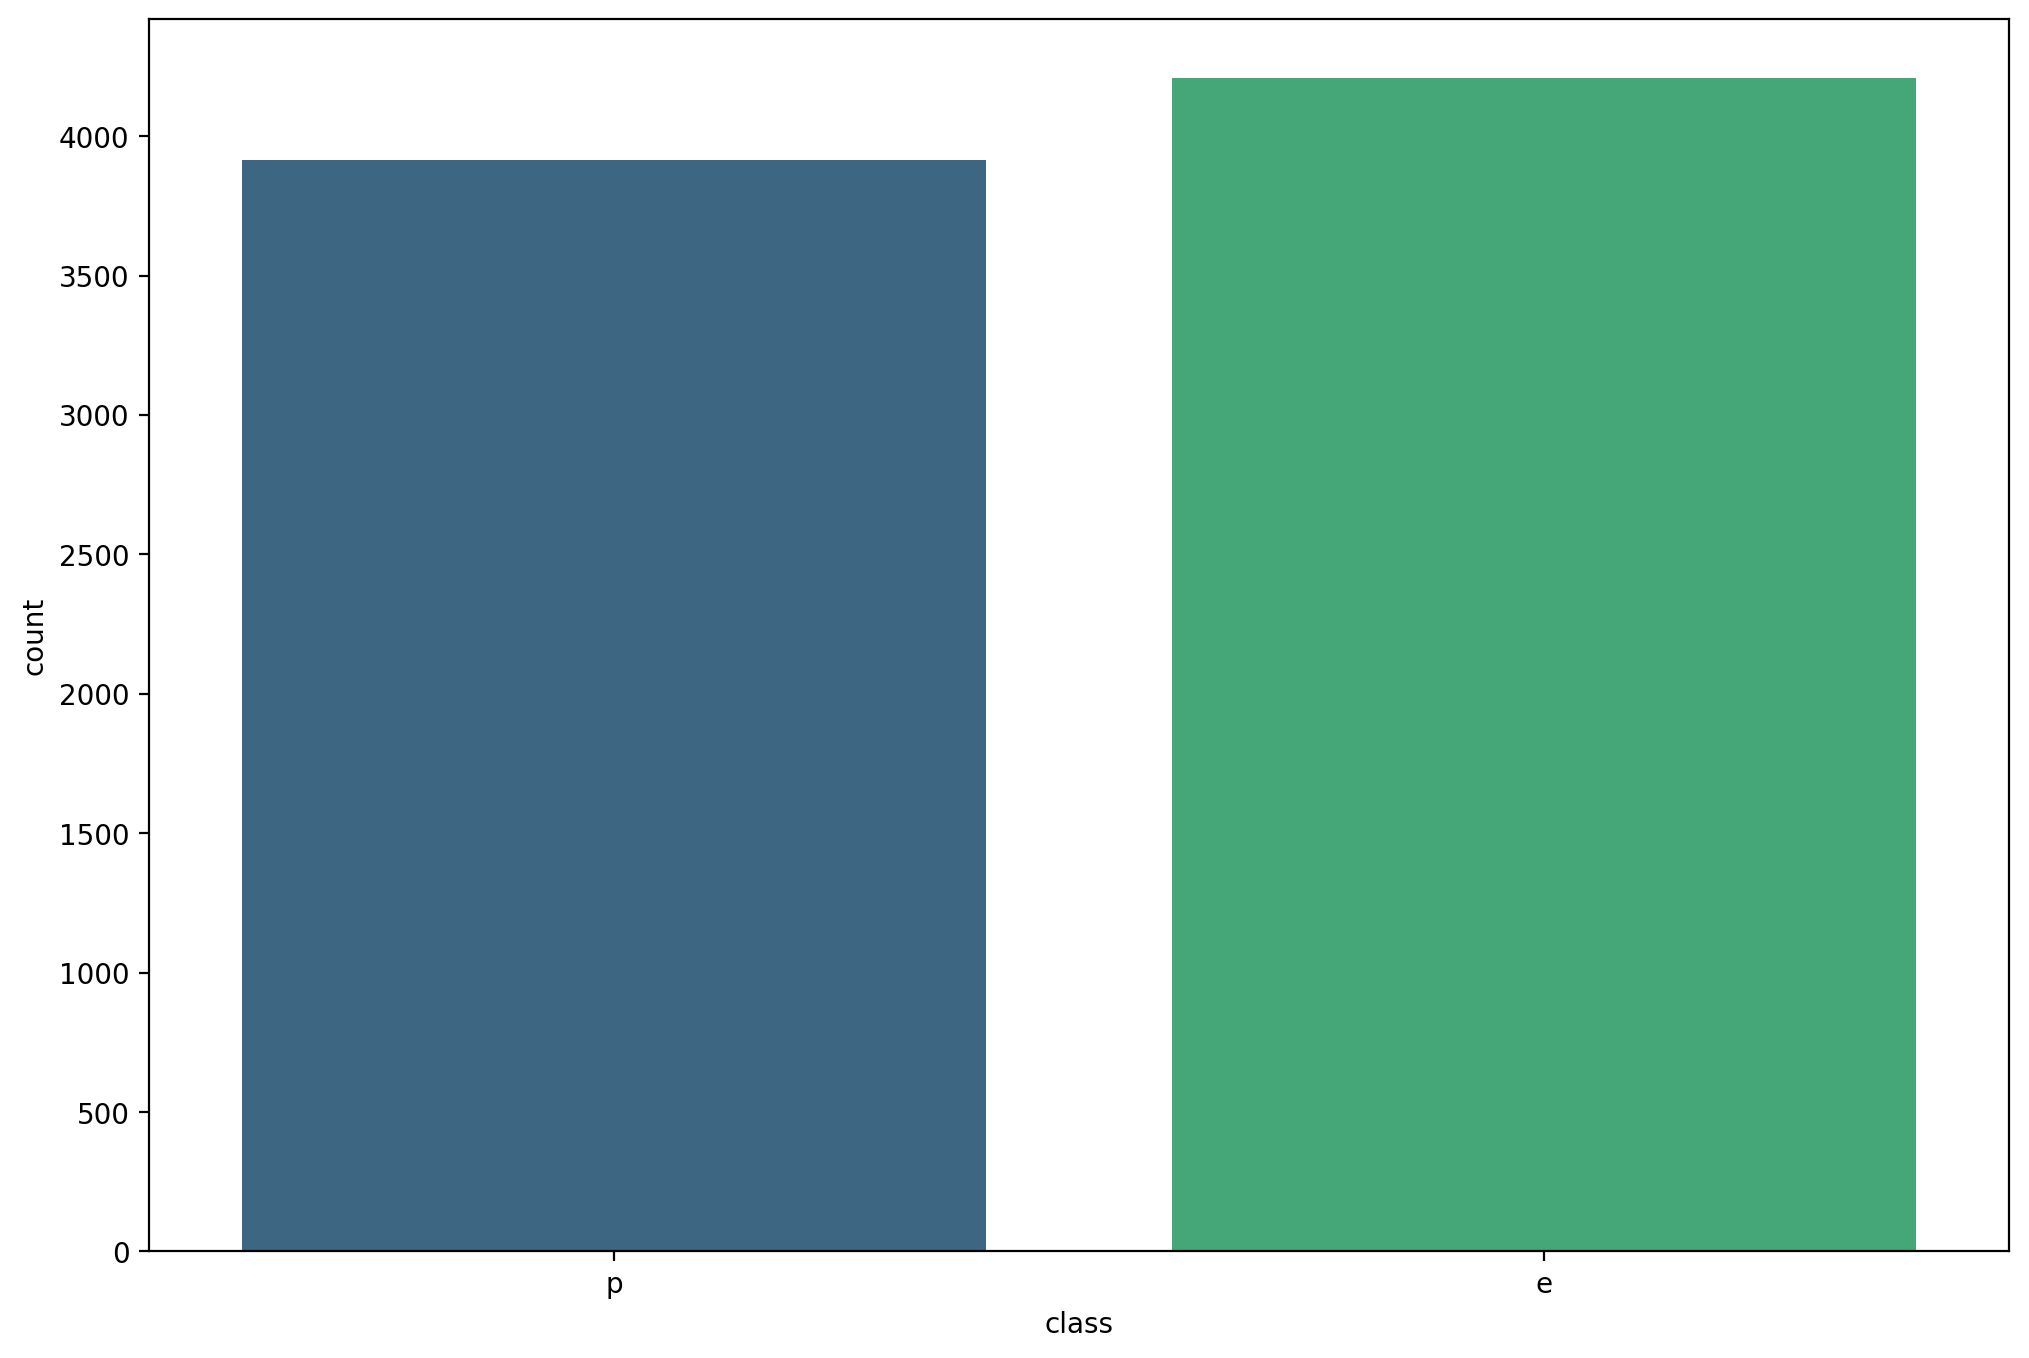

In [16]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='class', hue='class', palette='viridis')
plt.show()

В данном наборе классы практически идеально сбалансированы.

In [21]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Колонка *count* указывает на то, что у нас нет пропущенных значений. По колонке *unique* можно посмотреть сколько категорий содержит тот или иной признак. Колонка *top* - показывает какое значение встречается чаще всего для того или иного признака, а колонка *freq* - количество строк для наиболее частого значения *top*.

In [26]:
df.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


In [28]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

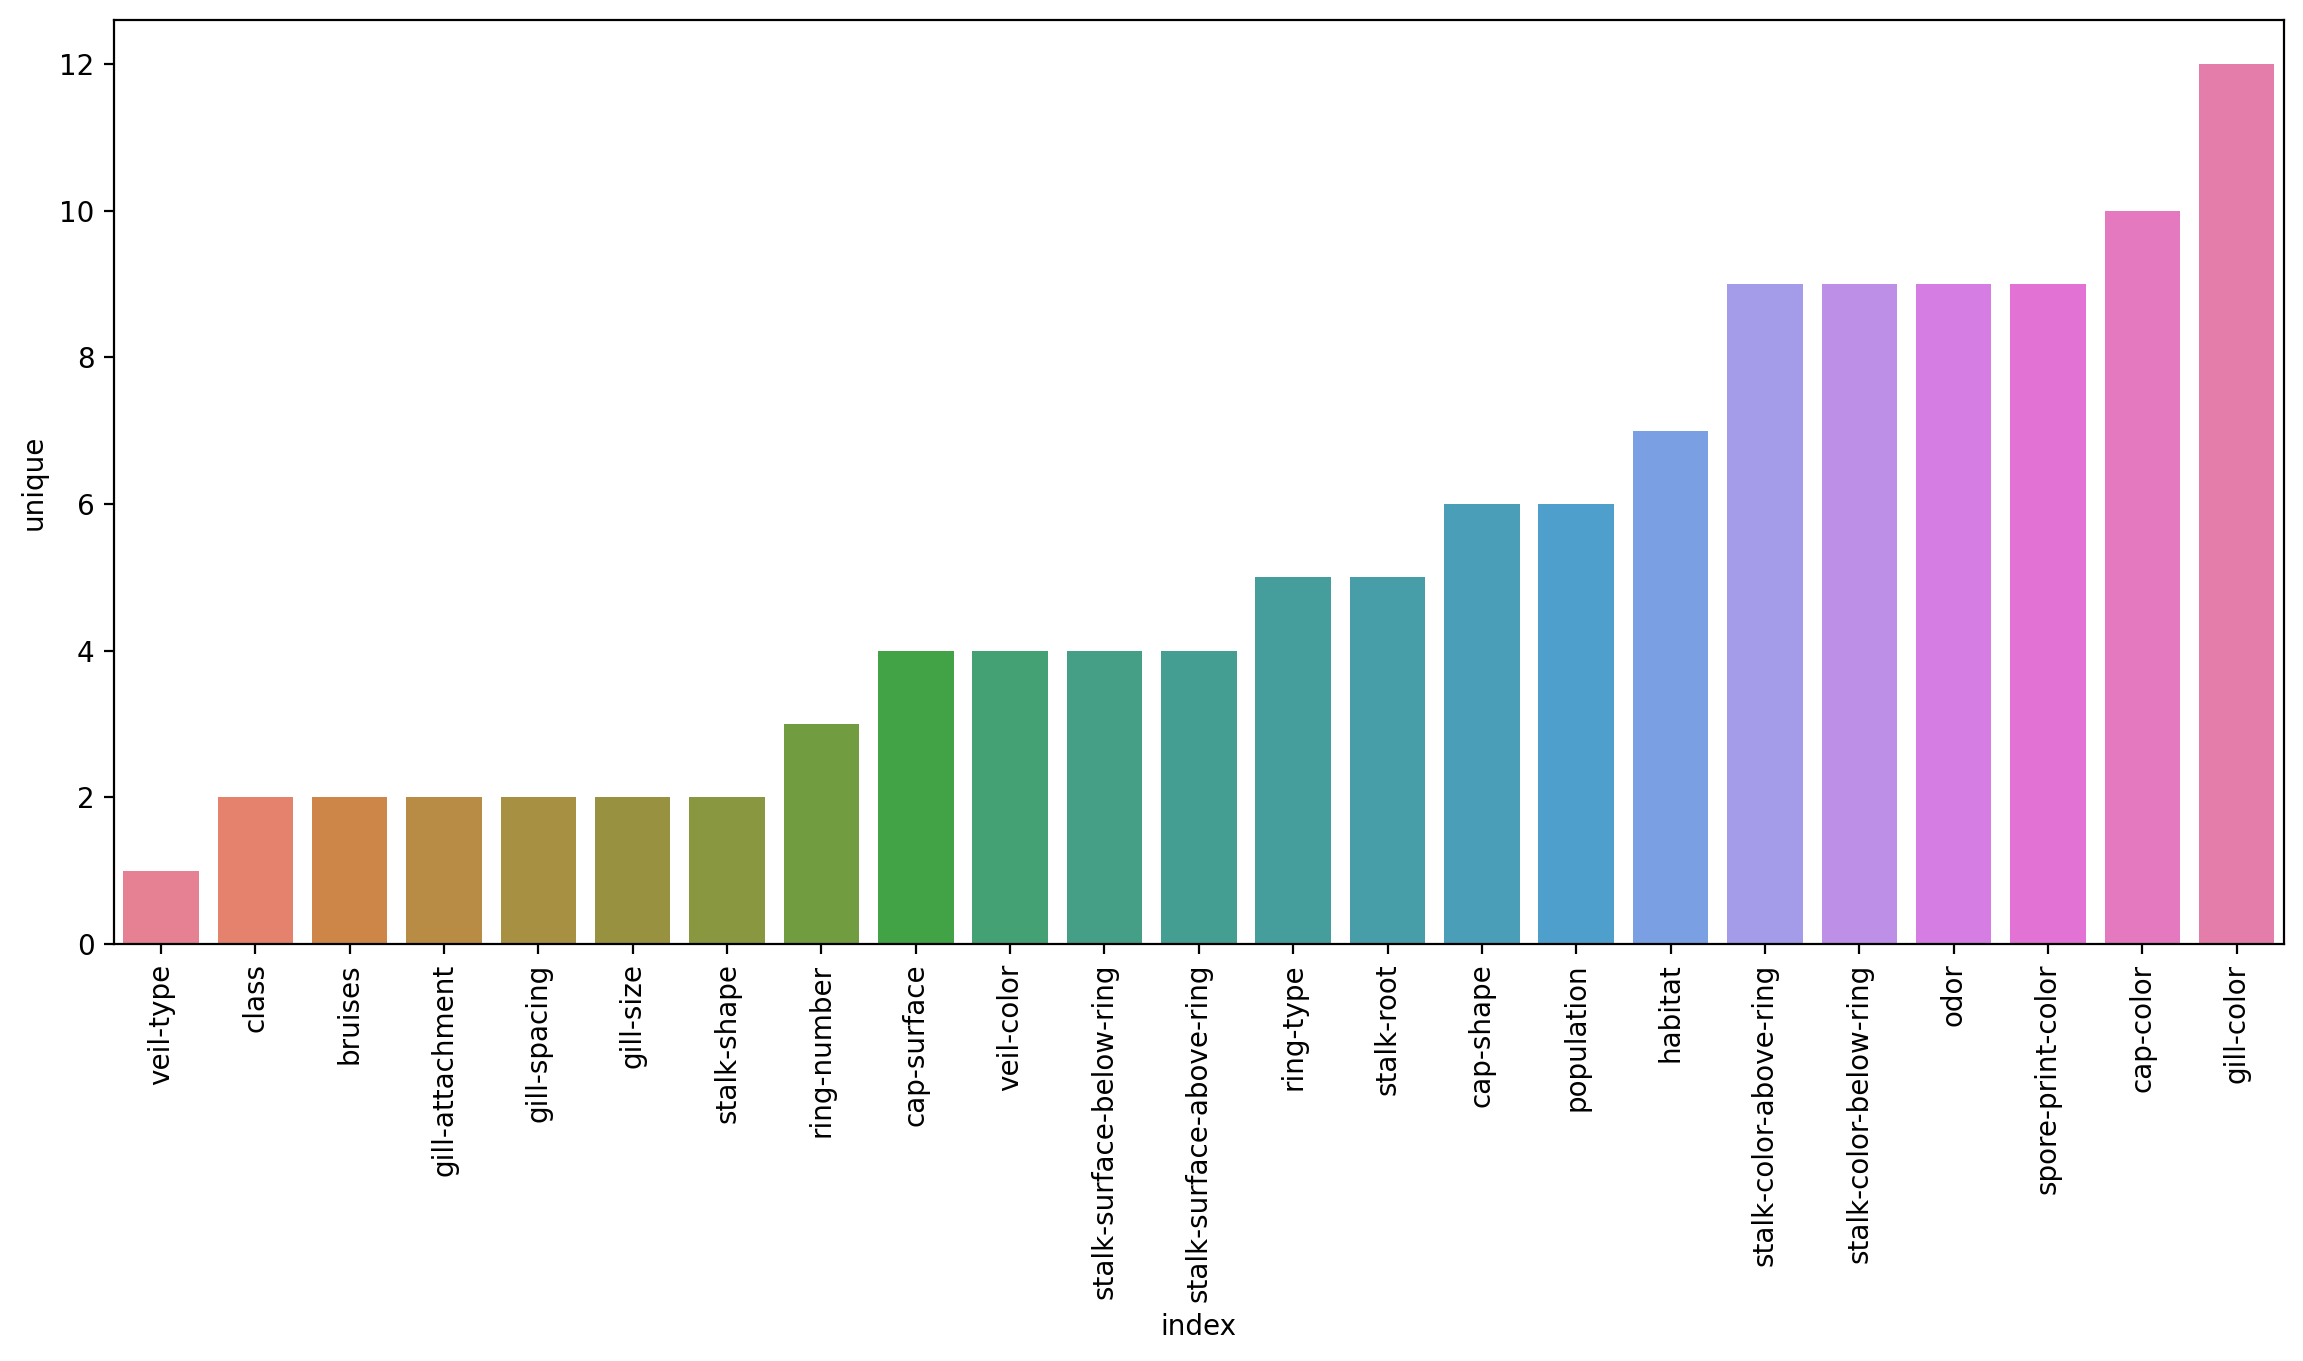

In [32]:
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=feat_uni, x='index', y='unique', hue='index')
plt.xticks(rotation=90)
plt.show()

Мы визуализировали количество уникальных значений для различных признаков. Эта информация пригодится при создании рекомендаций, потому что хотелось бы в рекомендациях указывать такие признаки, с которыми человеку будет легко работать. Для многих может быть сложно отличить 12 цветов друг от друга.

## Разбиение на обучающий и тестовый наборы данных - Train Test Split

In [40]:
X = df.drop('class', axis=1)

In [42]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

У нас нет отсутствующих значений, но X по-прежнему содержит категориальные признаки. Их необходимо преобразовать в дамми-переменные.

In [45]:
X = pd.get_dummies(X, drop_first=True, dtype='int')

In [47]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Теперь, когда в дальнейшем мы будем получать информацию о том, что какие-то из этих новых колонок являются важными для модели, мы не просто получим название какого-то признака, но ещё и значение, которое является важным, потому что здесь каждая дамми-переменная отвечает за какое-то значение.

In [50]:
y = df['class']

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

## Модель AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.utils._metadata_requests._RoutingNotSupportedMixin, sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='deprecated', random_state=None)
 |
 |  An AdaBoost classifier.
 |
 |  An AdaBoost [1]_ classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |
 |  This class implements the algorithm based on [2]_.
 |
 |  Read more in the :ref:`User Guide <adaboost>`.
 |
 |  .. versionadded:: 0.14
 |
 |  Parameters
 |  ----------
 |  estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support f

Один из основных параметров - `estimator`, в котором необходимо указать базовую модель машинного обучения. AdaBoost обучит эту модель на данных, а затем создает и обучает дополнительные копии этой модели, каждый раз обновляя веса для точек с данными. Можно указать любую модель, но в большинстве случаев - это деревья решений. Причём, если указать значение None, то по умолчанию будет выбран `DecisionTreeClassifier` с параметром `max_depth=1` - как раз простейшее дерево с одним корневым узлом и двумя листовыми узлами.

Параметр `n_estimators` - отвечает за то, сколько моделей будет создано, значение по умолчанию default=50.

Создадим для начала простую модель с параметром `n_estimators=1` - это означает, что модель должна выбирать один наилучший признак, по которому будет выполняться разбиение данных.

В нашей задаче это будет полезно для создания предостережений для людей по сбору грибов. Т.е. мы стараемся найти одно самое лучшее правило, вместо того чтобы создавать очень сложный набор из многих правил.

In [63]:
model = AdaBoostClassifier(n_estimators=1)

In [65]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

## Оценка работы модели

In [68]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [70]:
preds = model.predict(X_test)

In [72]:
preds

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [74]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



Для модели с одним простейшим деревом(только один узел разбиения данных, только по одному признаку) результаты получились достаточно неплохими.

Чтобы выяснить по какому именно признаку проходит разбиение можно сделать следующее:

In [79]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
# Получим индекс для 1
model.feature_importances_.argmax()

np.int64(22)

In [83]:
X.columns[22]

'odor_n'

Это признак - у гриба нет запаха. Получается первым критерием для создаваемой рекомендации о том, съедобный гриб или ядовитый - будет наличие запаха у гриба.

Можно также визуализировать различные значения для данного признака

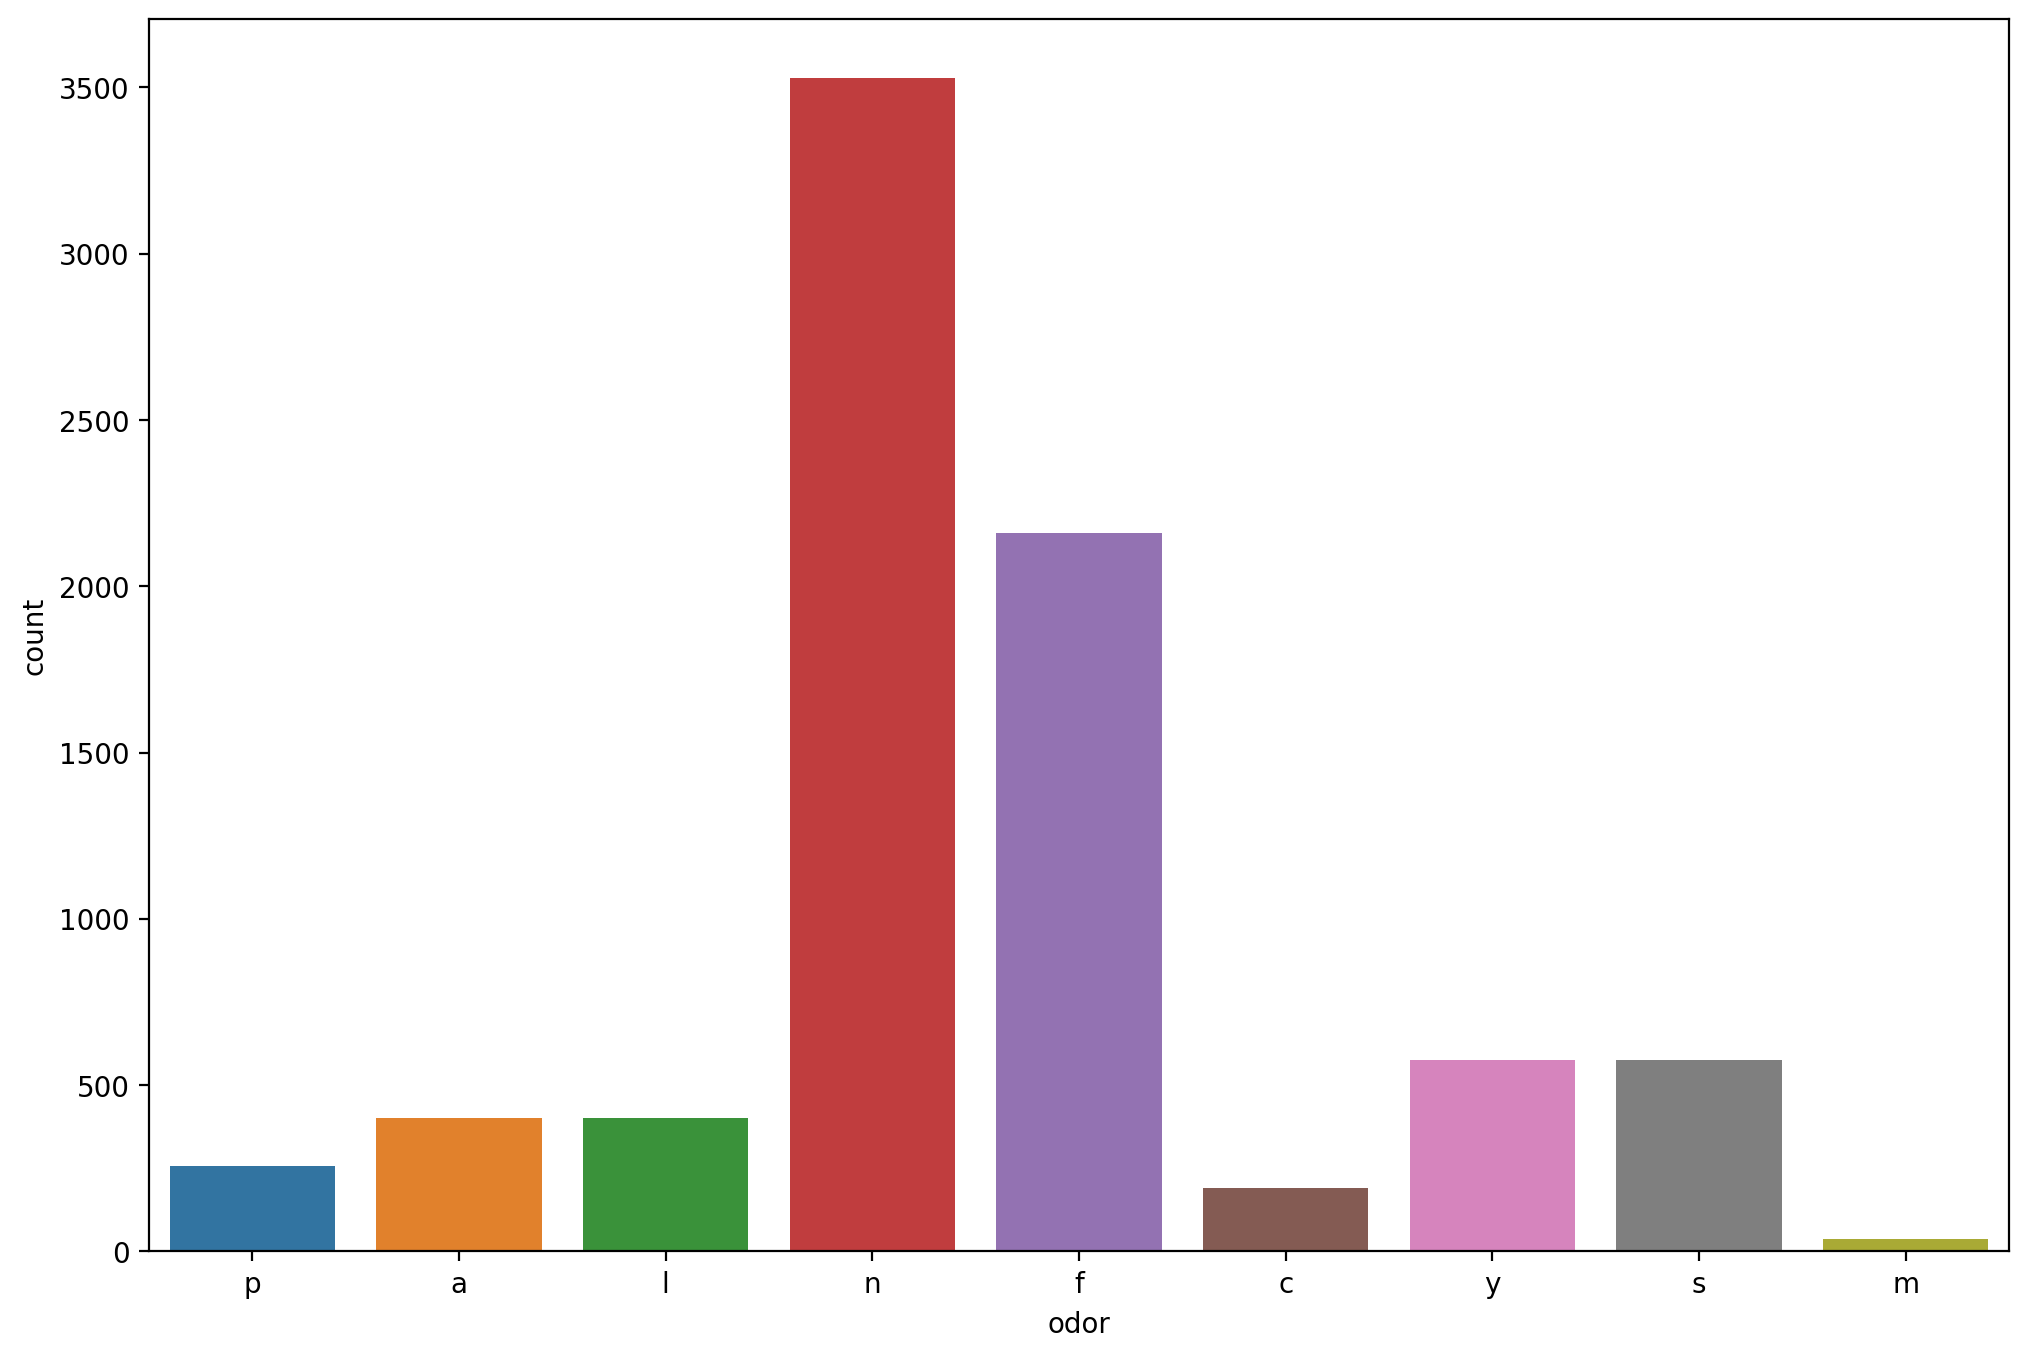

In [92]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='odor', hue='odor')
plt.show()

Можно заметить, что большинство грибов не имеют запаха.

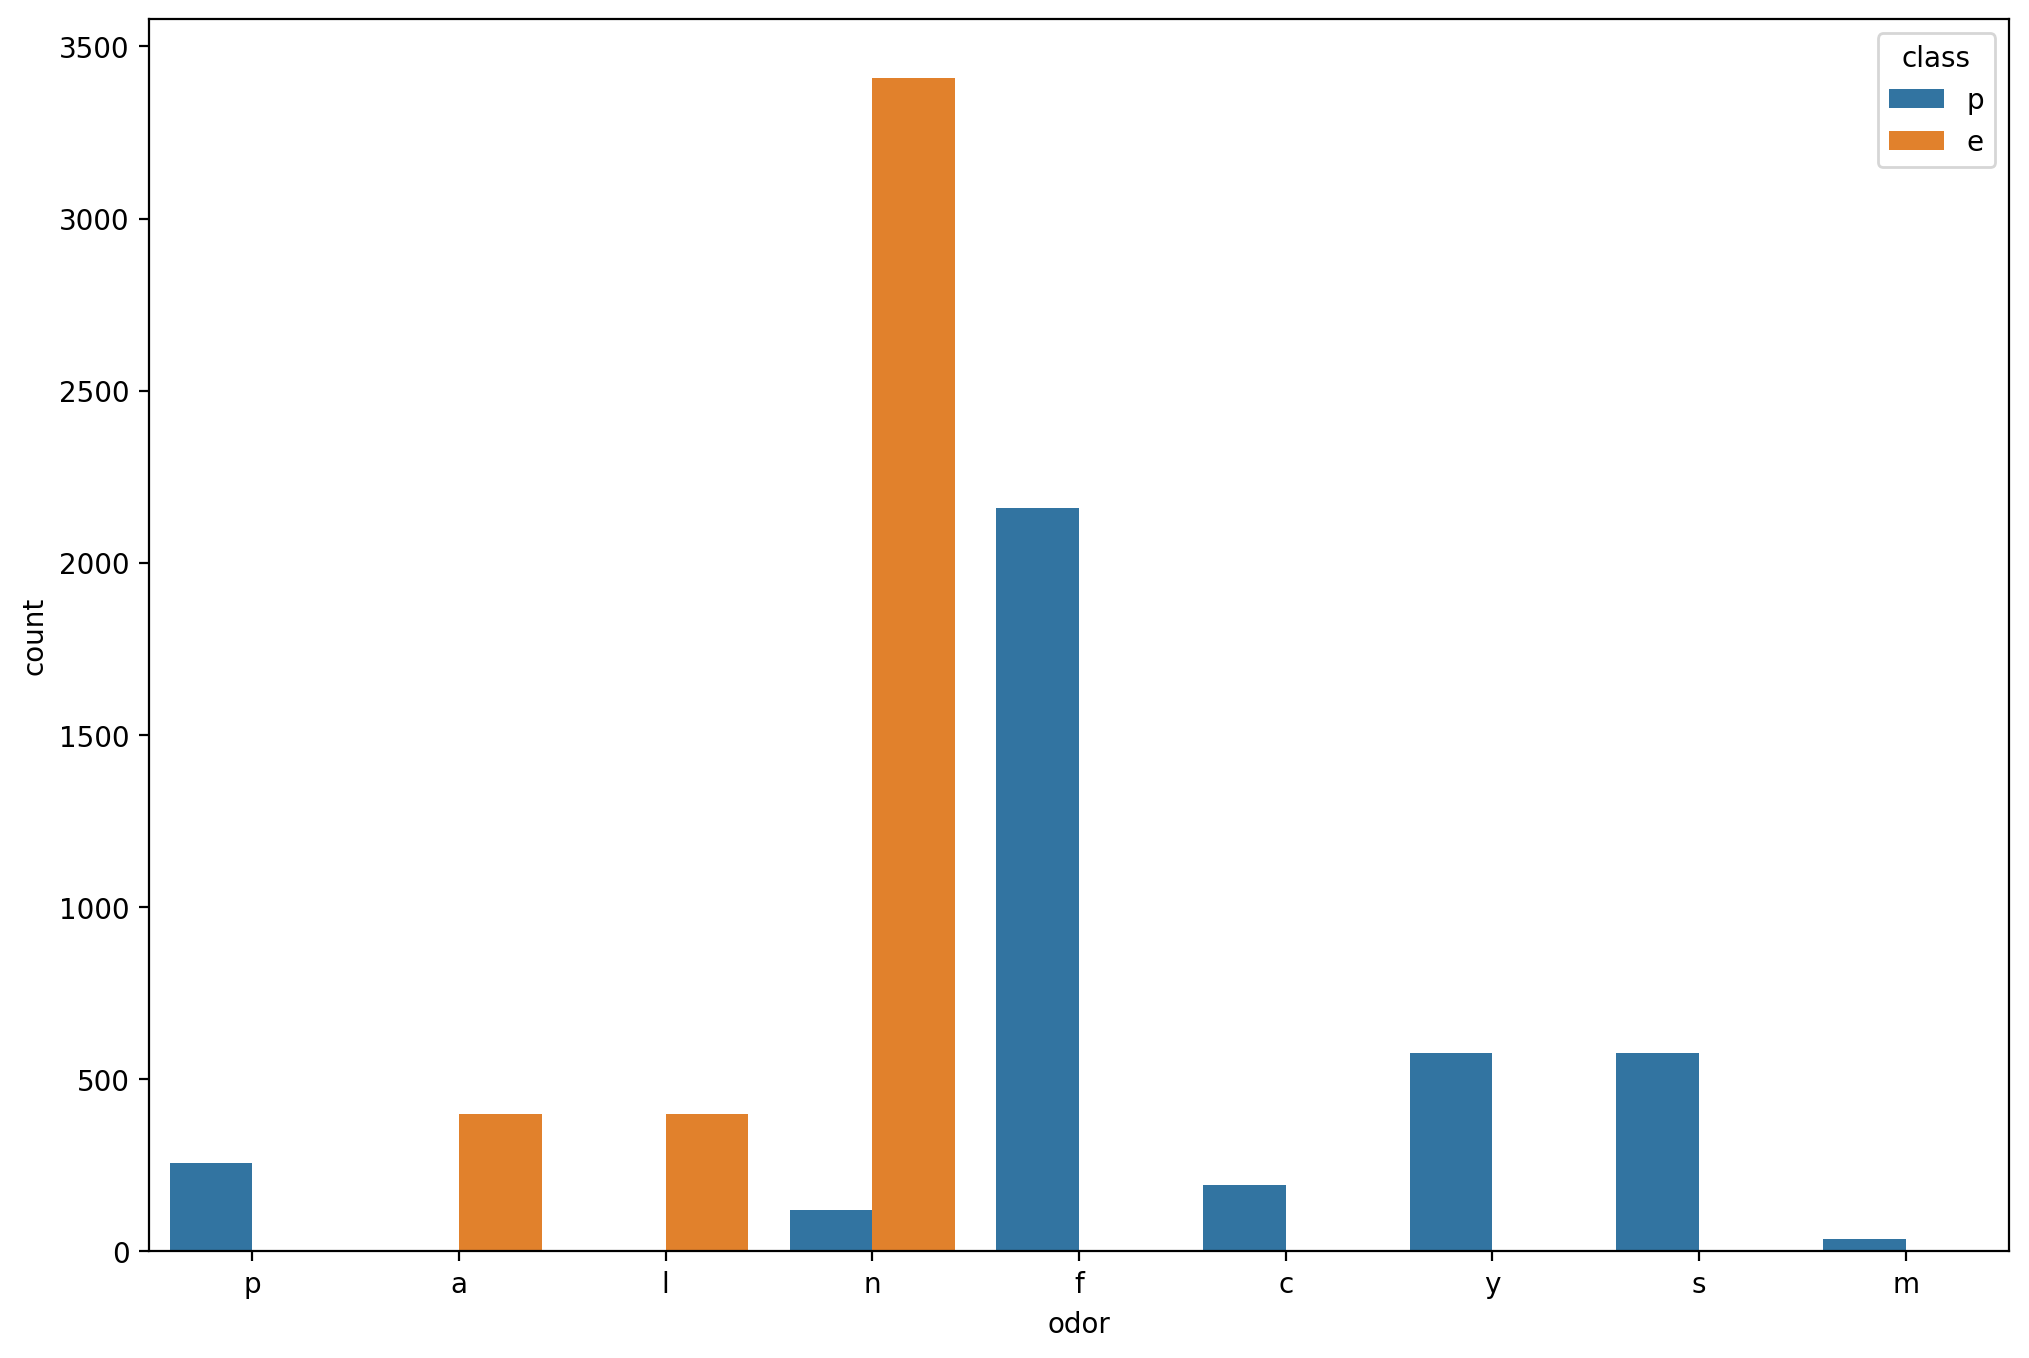

In [95]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='odor', hue='class')
plt.show()

Для значения odor=n - большинство грибов являются съедобными.

## Анализ производительности при добавлении weak learners.

In [99]:
len(X.columns)

95

Проверим, как будут меняться результаты модели при увеличении количества деревьев решений. Мы будем постепенно увеличивать сложность модели от 1 дерева до 95. При увеличении количества деревьев будем надеяться на то, что ошибка будет уменьшаться.

In [104]:
error_rates = []

for n in range(1, 96):

    # Создаём модель
    model = AdaBoostClassifier(n_estimators=n)

    # Обучаем модель
    model.fit(X_train, y_train)

    # Создаём предсказания модели
    preds = model.predict(X_test)

    # Вычисляем ошибку и добавляем её в список
    error = 1 - accuracy_score(y_test, preds)
    error_rates.append(error)

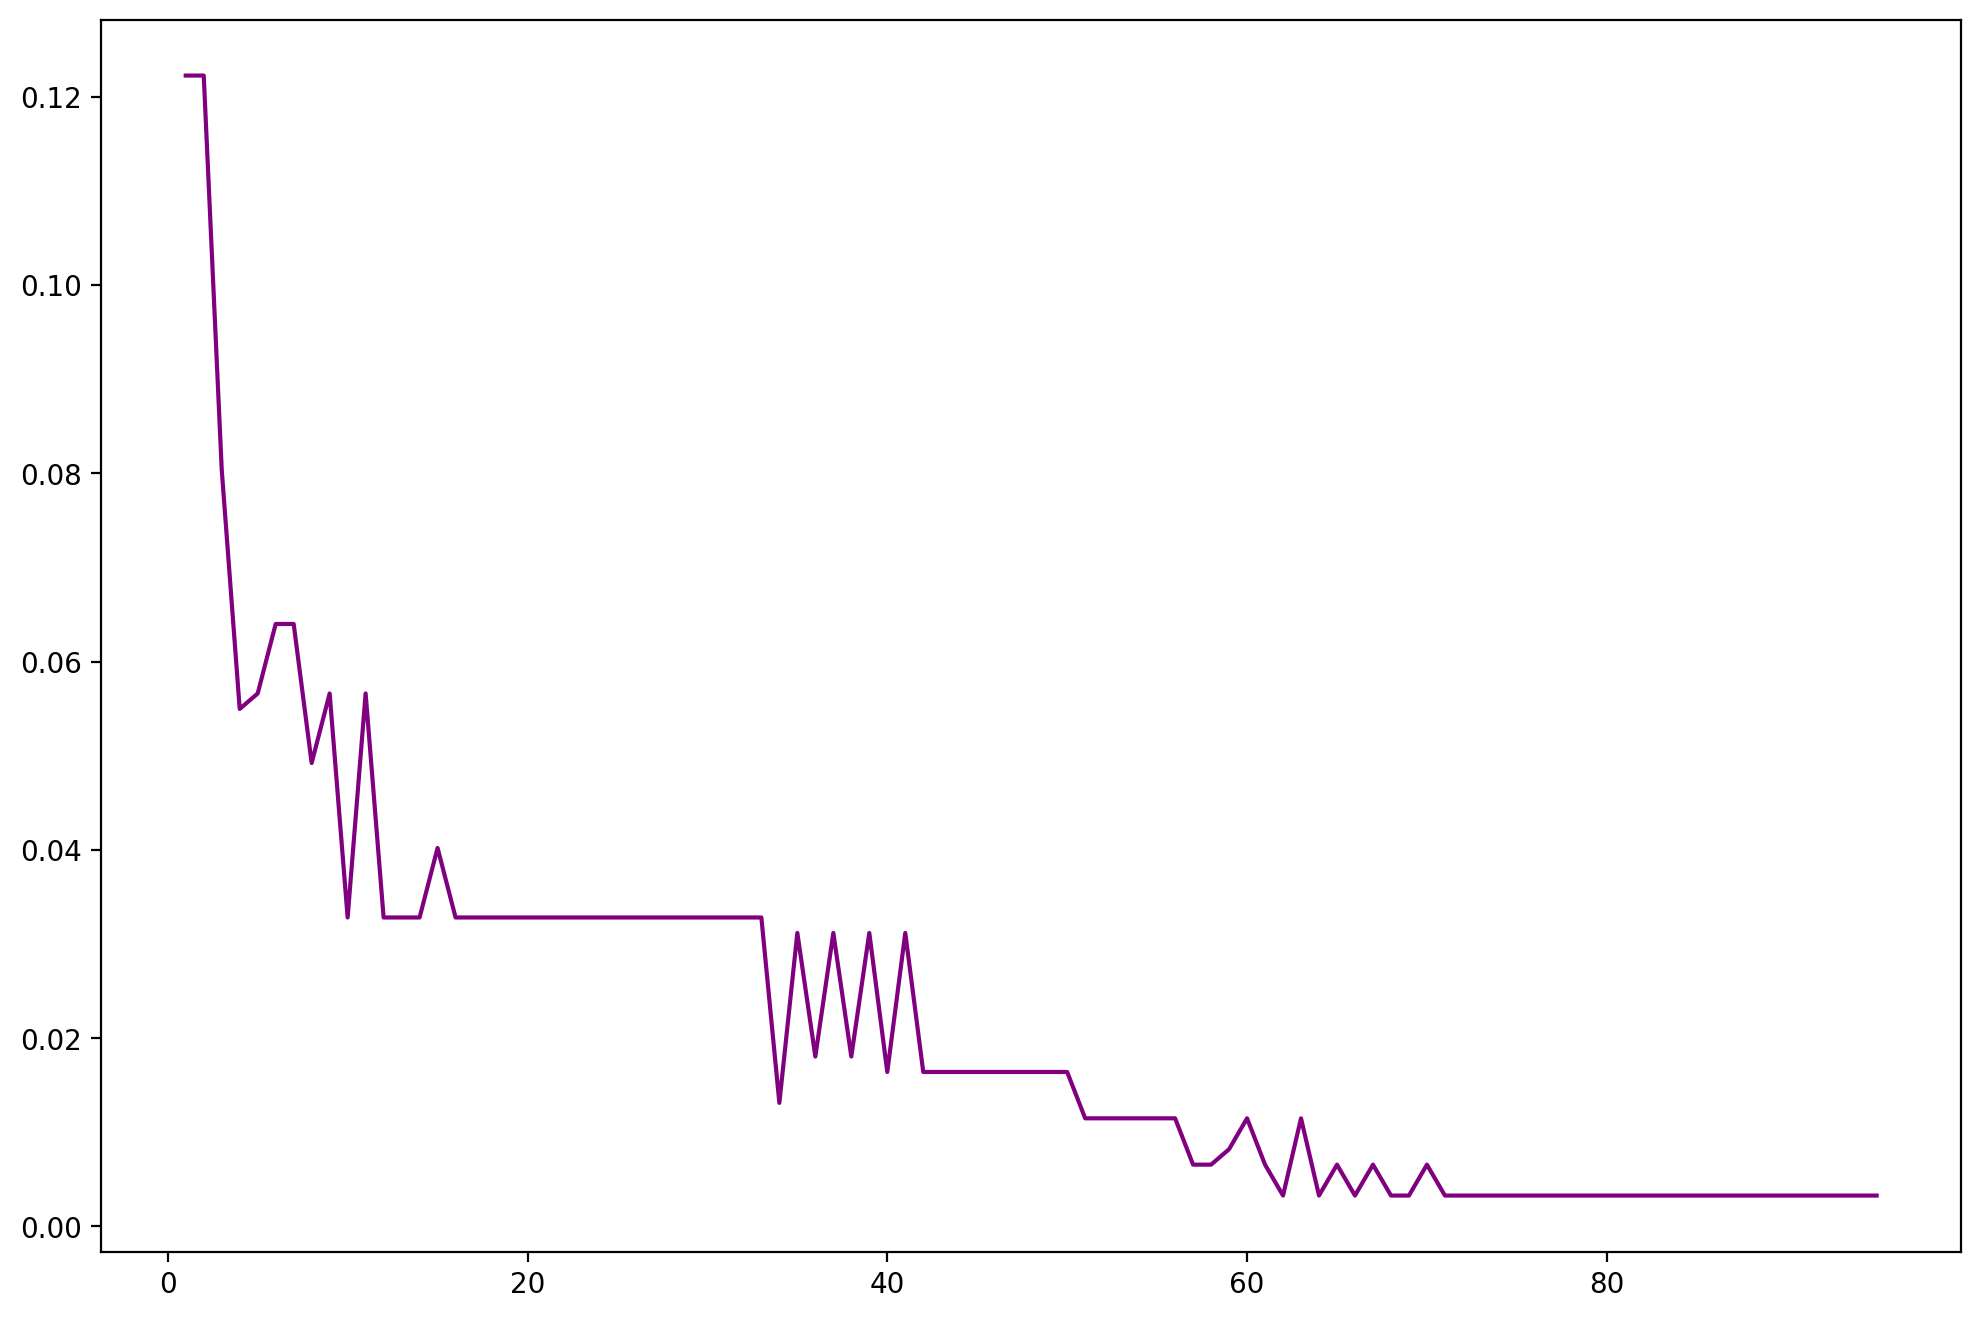

In [107]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(range(1, 96), error_rates, color='purple')
plt.show()

График начинается с ошибки в 12% и далее, при увеличении количества деревьев, график резко падает. Получается, даже если добавить всего несколько деревьев, то ошибка уже существенно уменьшится. И в какой-то момент график выходит на плато.

**Замечание: при добавлении дополнительных деревьев будут меняться коэффициенты важности для каждого признака.** Поэтому далеко не факт, что признак *odor_n* останется самым важным признаком, так как модель во время адаптивного бустинга каждый раз пересчитывает коэффициенты и в результате важность различных признаков может меняться.

In [110]:
model

AdaBoostClassifier(n_estimators=95)

In [112]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08758134, 0.15483051,
       0.03297374, 0.        , 0.07596867, 0.08553577, 0.        ,
       0.        , 0.        , 0.01449336, 0.04761456, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02261282, 0.        , 0.01960917, 0.        , 0.        ,
       0.04145947, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03716765, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02345876, 0.        , 0.     

In [114]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Важность'])

In [120]:
imp_feats = feats[feats['Важность']>0]
imp_feats

,Важность
odor_c,0.087581
odor_f,0.154831
odor_l,0.032974
odor_n,0.075969
odor_p,0.085536
gill-spacing_w,0.014493
gill-size_n,0.047615
stalk-shape_t,0.022613
stalk-root_c,0.019609
stalk-surface-above-ring_k,0.041459


Таким образом получаем список признаков, которые принимают участие в данной модели.

In [129]:
imp_feats = imp_feats.sort_values('Важность')

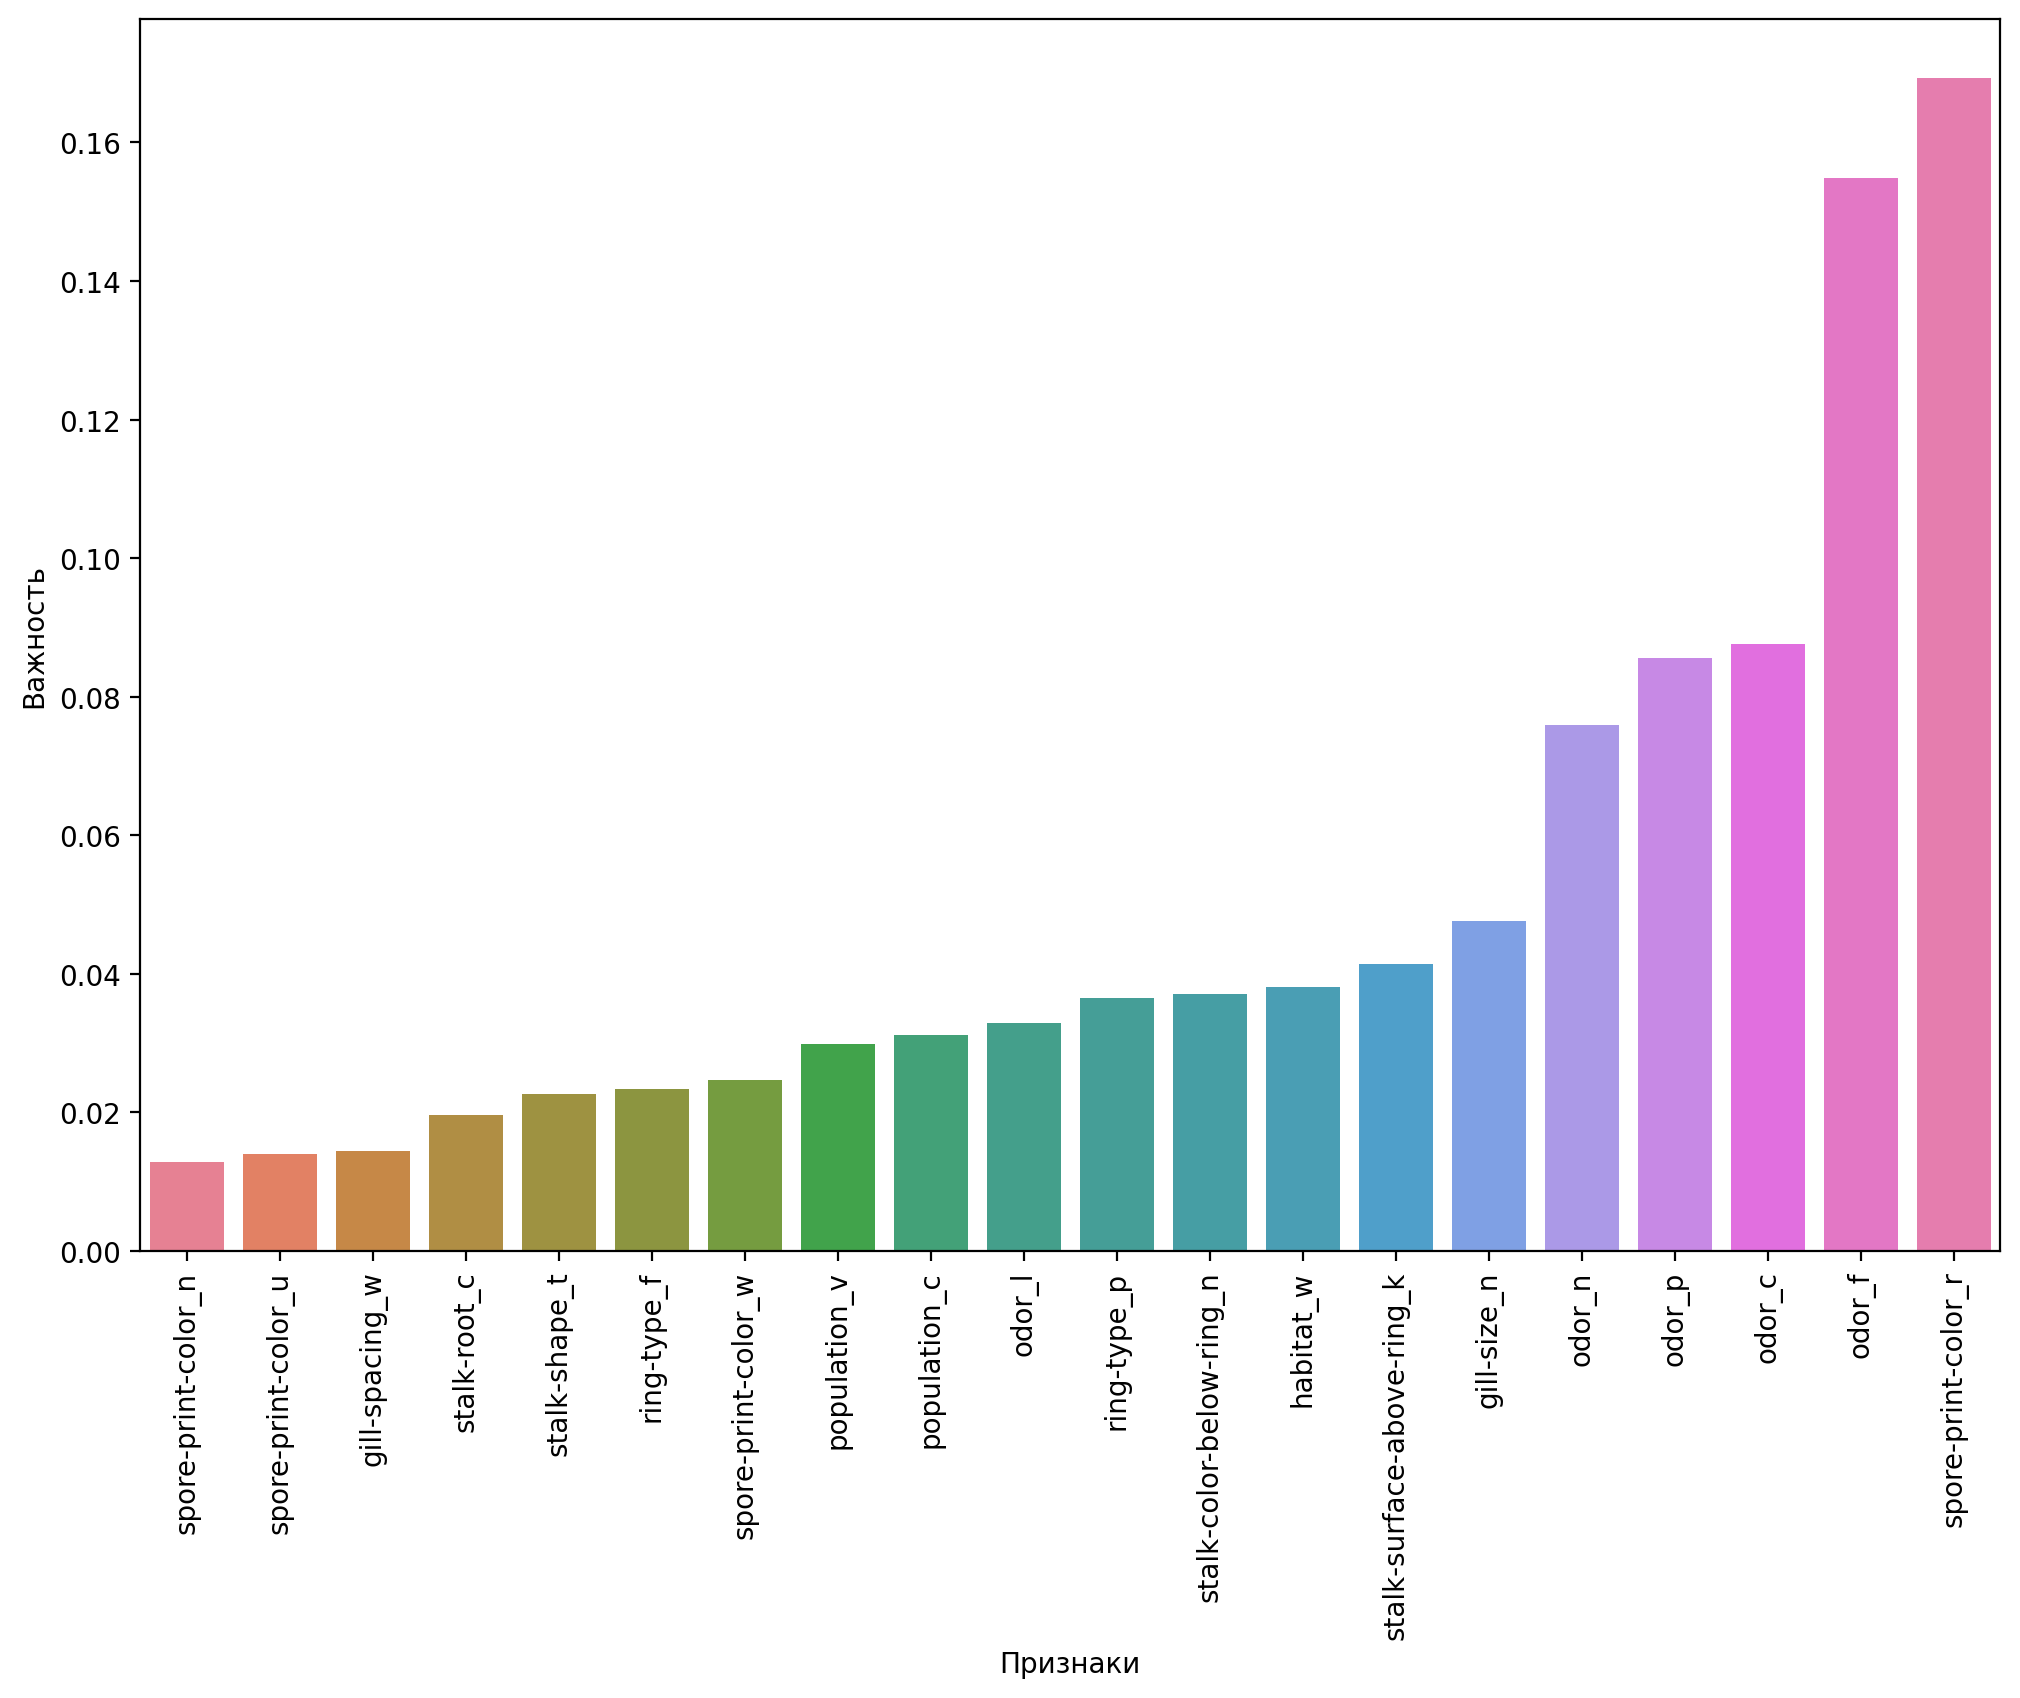

In [131]:
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index, y='Важность', hue=imp_feats.index)
plt.xlabel('Признаки')
plt.xticks(rotation=90)
plt.show()